In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

In [2]:
df=pd.read_csv('./austa.csv',parse_dates=['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    31 non-null     datetime64[ns]
 1   value   31 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 628.0 bytes


In [3]:
df = df.set_index("date")

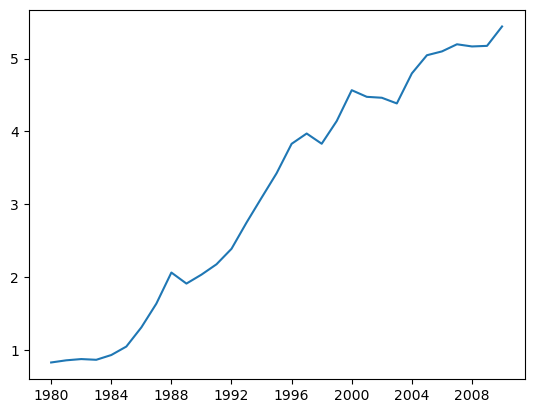

In [4]:
plt.plot(df.index,df['value'].values)
plt.show()

In [5]:
df["diff_1"] = df["value"].diff(1).fillna(method="bfill")
# print(df["diff_1"])

In [7]:
# 平稳性检验
print(sm.tsa.stattools.adfuller(df["value"]) )

(-0.3582937450138256, 0.9168328101084945, 0, 30, {'1%': -3.6699197407407405, '5%': -2.9640707407407407, '10%': -2.621171111111111}, -11.961874893004975)


In [16]:
# 白噪声检验
acorr_ljungbox(df["diff_1"], lags = [6, 12],boxpierce=True)

lb_stat  lb_pvalue   bp_stat  bp_pvalue
6   3.448929   0.750752  3.009323   0.807676
12  5.235656   0.949641  4.170294   0.980164

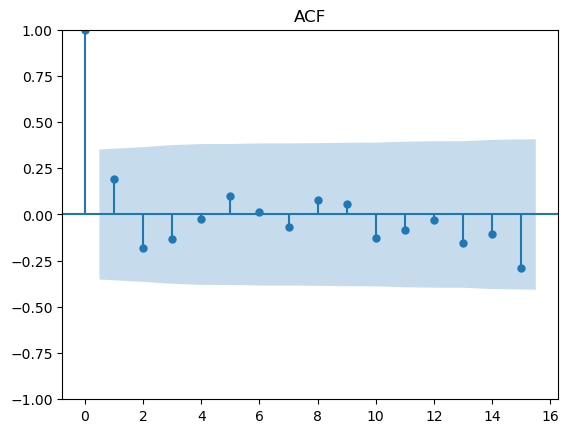

In [17]:
# 计算ACF
acf=plot_acf(df["diff_1"])
plt.title("ACF")
plt.show()

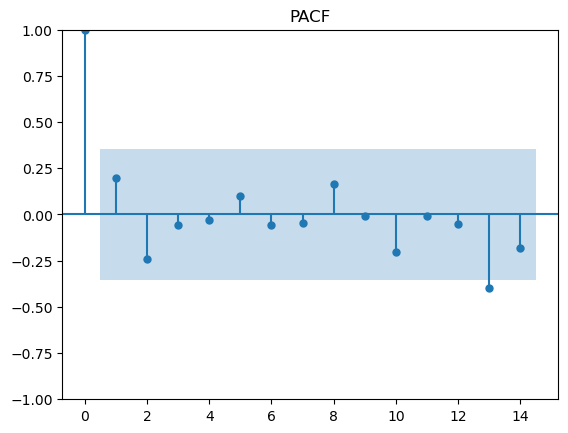

In [19]:
# PACF
pacf=plot_pacf(df["diff_1"], lags=14)
plt.title("PACF")
plt.show()

In [14]:
# trend_evaluate = sm.tsa.arma_order_select_ic(df["diff_1"], ic=['aic', 'bic'], trend='n', max_ar=16,
#                                             max_ma=14)
# print('AIC', trend_evaluate.aic_min_order)
# print('BIC', trend_evaluate.bic_min_order)

In [19]:
model = ARIMA(df["diff_1"], order=(1, 1, 1)).fit()  # 建立ARIMA(p, diff+num, q)模型
print('模型报告为：\n', model.summary())

模型报告为：
                                SARIMAX Results                                
Dep. Variable:                 diff_1   No. Observations:                   31
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   8.205
Date:                Fri, 09 Aug 2024   AIC                            -10.410
Time:                        16:44:14   BIC                             -6.206
Sample:                    01-01-1980   HQIC                            -9.065
                         - 01-01-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2292      0.195      1.175      0.240      -0.153       0.611
ma.L1         -0.9981      5.093     -0.196      0.845     -10.980       8.984
sigma2         0.0307      0.158      0.195 

D:\Anaconde\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
D:\Anaconde\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
D:\Anaconde\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
D:\Anaconde\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
